In [ ]:
#将数据导入

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series,DataFrame
import numpy as np
data=pd.read_excel('职位表.xlsx')
print('数据大小:',data.shape)
data.head()


数据大小: (302, 12)


,城市,区域,职位,技能要求,薪资,工作年限,学历,公司全称,行业,规模,福利待遇,经济实力
0,郑州,金水区,高级数据分析师,"['数据分析', 'SQLServer']",10k-15k,5-10年,本科,郑州时空隧道信息技术有限公司,"移动互联网,消费生活",150-500人,"五险一金,海外旅游,带薪年假,节日福利",B轮
1,郑州,高新区,数据分析师,"['人工智能', '机器学习', '深度学习', '推荐']",15k-25k,3-5年,本科,中移在线服务有限公司,移动互联网,2000人以上,"六险两金,扁平化,高福利,高奖励",不需要融资
2,郑州,中原区,数据分析师-郑州,"['产品运营', 'APP运营', '用户留存']",8k-15k,1-3年,本科,神策网络科技（北京）有限公司,数据服务,150-500人,"五险一金,午餐补助,补充医疗,14薪",C轮
3,郑州,中原区,数据分析师,"['数据分析', '数据运营']",8k-12k,1-3年,大专,安徽省刀锋网络科技有限公司,"移动互联网,游戏",500-2000人,"五险一金,带薪年假,部门聚餐,弹性时间",B轮
4,郑州,金水区,数据分析,"['数据分析', 'SPSS', 'SQL']",7k-12k,3-5年,本科,郑州时空隧道信息技术有限公司,"移动互联网,消费生活",150-500人,五险一金、节日福利、多样团建活动,B轮


In [ ]:
#对‘技能要求这一列进行分词，进行词频统计’

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.


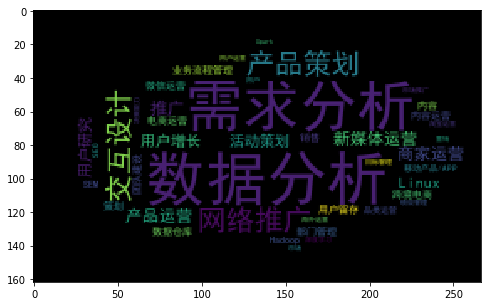

In [76]:
data_skills=data['技能要求']
st=[]
for i in range(302):
    for x in data_skills[i]:
        dele=['[',']',"’"]
        if x not in dele:
            st.append(x)
            str1=''.join(st).replace("'", "").split(',')
df_skill=DataFrame({'skill':str1})
skill_count=df_skill.groupby(by=['skill'])['skill'].agg({'count':np.size})
skill_count=skill_count.reset_index().sort_values(by=['count'],ascending=False)
from wordcloud import WordCloud
from imageio import imread
import matplotlib
matplotlib.rcParams['figure.figsize']=(10.0,5.0)
wordcloud=WordCloud(font_path='/data/simhei.ttf',background_color='black',width=400, height=300, random_state=42,mask=imread('cloud.png',pilmode="RGB"),collocations=False)
word_frequence={x[0]:x[1] for x in skill_count.values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

In [90]:
k=DataFrame(pd.Series(word_frequence), columns=['count'])
k

,count
数据分析,8
需求分析,7
网络推广,6
产品策划,6
交互设计,6
新媒体运营,5
商家运营,5
推广,5
产品运营,5
活动策划,4


In [ ]:
#对公司区域、薪资，学历水平，工作年限，在一块画布上输出多个相关的图形，进行多角度分析

In [196]:
df_area=data['区域']
df_area=DataFrame(df_area)
area_count=df_area.groupby(by=['区域'])['区域'].agg({'count':np.size})
area_count=area_count.reset_index().sort_values(by=['count'],ascending=False)
area_frequence={x[0]:x[1] for x in area_count.values}
area=DataFrame(pd.Series(area_frequence), columns=['count'])
sum_a=area['count'].sum()
data_a=[]
for i in range(13):
    p='{:.1f}%'.format(int(area['count'][i])/sum_a*100)
    data_a.append(p)
data_a
area['percent']=data_a
area

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,count,percent
金水区,98,32.5%
郑东新区,58,19.2%
高新区,50,16.6%
中原区,29,9.6%
二七区,23,7.6%
管城回族区,15,5.0%
经开区,9,3.0%
管城区,8,2.6%
惠济区,3,1.0%
新郑市,3,1.0%


In [195]:
df_edu=data['学历']
df_edu=DataFrame(df_edu)
edu_count=df_edu.groupby(by=['学历'])['学历'].agg({'count':np.size})
edu_count=edu_count.reset_index().sort_values(by=['count'],ascending=False)
edu_frequence={x[0]:x[1] for x in edu_count.values}
edu=DataFrame(pd.Series(edu_frequence), columns=['count'])
sum_e=edu['count'].sum()
data_e=[]
for i in range(4):
    p='{:.1f}%'.format(int(edu['count'][i])/sum_e*100)
    data_e.append(p)
edu['percent']=data_e
edu

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,count,percent
本科,151,50.0%
大专,117,38.7%
不限,31,10.3%
硕士,3,1.0%


In [183]:
df_wy=data['工作年限']
df_wy=DataFrame(df_wy)
wy_count=df_wy.groupby(by=['工作年限'])['工作年限'].agg({'count':np.size})
wy_count=wy_count.reset_index().sort_values(by=['count'],ascending=False)
wy_frequence={x[0]:x[1] for x in wy_count.values}
wy=DataFrame(pd.Series(wy_frequence), columns=['count'])
wy1=wy.reset_index()
wy1

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,index,count
0,3-5年,114
1,1-3年,82
2,不限,49
3,5-10年,32
4,应届毕业生,21
5,1年以下,4


In [180]:
df_salary=data['薪资']
df_salary=DataFrame(df_salary)
salary_count=df_salary.groupby(by=['薪资'])['薪资'].agg({'count':np.size})
salary_count=salary_count.reset_index().sort_values(by=['count'],ascending=False)
salary_frequence={x[0]:x[1] for x in salary_count.values}
salary=DataFrame(pd.Series(salary_frequence), columns=['count'])
salary.reset_index()
salary

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,count
4k-8k,23
5k-10k,21
10k-15k,20
6k-10k,17
6k-12k,16
4k-6k,16
5k-8k,15
10k-20k,14
8k-12k,13
8k-10k,12


<function matplotlib.pyplot.show(*args, **kw)>

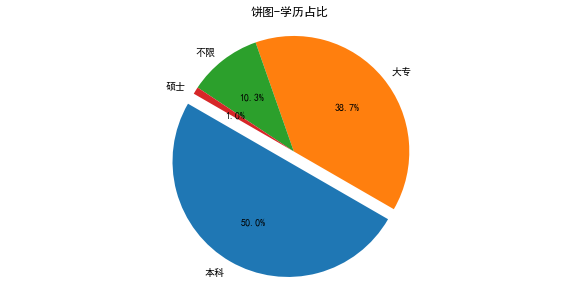

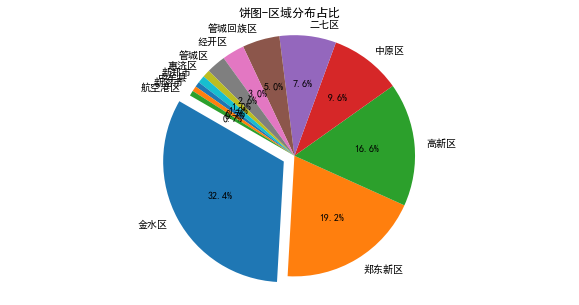

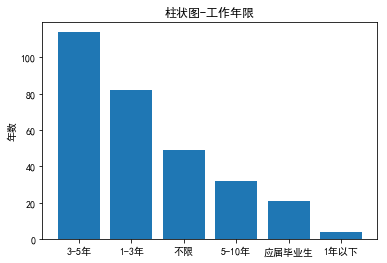

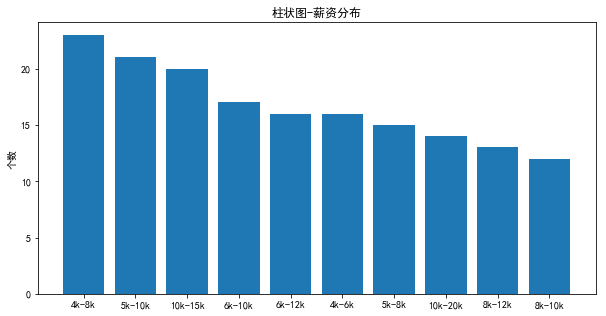

In [194]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
#学历是图1，用饼图表示
plt.figure()
label1 = ['本科','大专','不限','硕士']
sizes = [50.0,38.7,10.3,1.0]
explode = (0.1,0,0,0)
plt.pie(sizes,explode=explode,labels=label1,autopct='%1.1f%%',shadow=False,startangle=150)
plt.axis('equal')#该行代码使饼图长宽相等
plt.title("饼图-学历占比")

#区域是图2，用饼图表示
plt.figure()
label2 = ['金水区','郑东新区','高新区','中原区','二七区','管城回族区','经开区','管城区','惠济区','新郑市','中牟县',
          '新密市','航空港区']
sizes = [32.5,19.2,16.6,9.6,7.6,5.0,3.0,2.6,1.0,1.0,0.7,0.7,0.7]
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0)
plt.pie(sizes,explode=explode,labels=label2,autopct='%1.1f%%',shadow=False,startangle=150)
plt.axis('equal')#该行代码使饼图长宽相等
plt.title("饼图-区域分布占比")
#工作年限是图3，用柱状图表示
plt.figure(figsize = (6,4))
wy1=wy.reset_index()
x3=wy1['index'].values.tolist()
y3=wy1['count'].values.tolist()
plt.bar(x3,y3)
plt.ylabel('年数')
plt.title('柱状图-工作年限')
plt.show

#薪资分布是图4
plt.figure()
s1=salary.reset_index()
x4=s1['index'][:10].values.tolist()
y4=s1['count'][:10].values.tolist()
plt.ylabel('个数')
plt.title('柱状图-薪资分布')
plt.bar(x4,y4)
plt.show   

